In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
%matplotlib inline

In [16]:
data=pd.read_csv("/kaggle/input/product-prices-and-sizes-from-walmart-grocery/WMT_Grocery_202209.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568534 entries, 0 to 568533
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              568534 non-null  int64  
 1   SHIPPING_LOCATION  568534 non-null  int64  
 2   DEPARTMENT         568534 non-null  object 
 3   CATEGORY           568534 non-null  object 
 4   SUBCATEGORY        361324 non-null  object 
 5   BREADCRUMBS        568534 non-null  object 
 6   SKU                568534 non-null  int64  
 7   PRODUCT_URL        568534 non-null  object 
 8   PRODUCT_NAME       568534 non-null  object 
 9   BRAND              568507 non-null  object 
 10  PRICE_RETAIL       568534 non-null  float64
 11  PRICE_CURRENT      568534 non-null  float64
 12  PRODUCT_SIZE       505709 non-null  object 
 13  PROMOTION          0 non-null       float64
 14  RunDate            568534 non-null  object 
 15  tid                568534 non-null  int64  
dtypes:

In [18]:
df=data.copy()

In [19]:
df['SHIPPING_LOCATION']

0         79936
1         79936
2         79936
3         79936
4         79936
          ...  
568529    70072
568530    70072
568531    70072
568532    70072
568533    70072
Name: SHIPPING_LOCATION, Length: 568534, dtype: int64

In [20]:
df['DEPARTMENT']

0            Deli
1            Deli
2            Deli
3            Deli
4            Deli
           ...   
568529    Alcohol
568530    Alcohol
568531    Alcohol
568532    Alcohol
568533    Alcohol
Name: DEPARTMENT, Length: 568534, dtype: object

In [21]:
df['BRAND'].value_counts()

Great Value             80387
Freshness Guaranteed    17815
Marketside              15772
PRODUCE UNBRANDED        8643
Kraft                    4561
                        ...  
Il Poggione                 1
MOUNT VEEDER                1
Chalet Debonne              1
Earthquake                  1
Ole Orleans                 1
Name: BRAND, Length: 4368, dtype: int64

In [22]:
df['BRAND'].value_counts().head(10)

Great Value             80387
Freshness Guaranteed    17815
Marketside              15772
PRODUCE UNBRANDED        8643
Kraft                    4561
Starbucks                4441
Hershey's                4302
Hormel                   3879
Pillsbury                3784
Coffeemate               3619
Name: BRAND, dtype: int64

In [23]:
df['PRODUCT_NAME'].value_counts()

Salad Pizazz! Honey Roasted Sunflower Kernals Salad Topping, 6.5 oz, Non-GMO       361
Kerrygold Grass-Fed Dubliner Irish Cheese, 7oz.                                    327
(4 Cans) Great Value Chunk Chicken Breast, 12.5 oz                                 311
Great Value Finely Shredded Fiesta Blend Cheese, 32 oz                             269
Fresh Gourmet Cranberries & Sunflower Kernels, Gluten Free, Salad Topping, 4 oz    266
                                                                                  ... 
El Sembrador Diced Onions & Peppers, 16 oz                                           1
Homebake 425/:30 Green Bean Casserole Veggie Dish, 15.5 oz Box (Frozen)              1
Homebake 425/:30 Chicken Parmesan Frozen Meal, 19.8 oz Box                           1
Homebake 425/:30 Cheesy Broccoli Veggie Dish, 19.4 oz Box (Frozen)                   1
Ole Orleans Heritage Riesling 750ml                                                  1
Name: PRODUCT_NAME, Length: 30688, dtype: i

In [24]:
df['PRODUCT_NAME'].value_counts().head(10)

Salad Pizazz! Honey Roasted Sunflower Kernals Salad Topping, 6.5 oz, Non-GMO                                              361
Kerrygold Grass-Fed Dubliner Irish Cheese, 7oz.                                                                           327
(4 Cans) Great Value Chunk Chicken Breast, 12.5 oz                                                                        311
Great Value Finely Shredded Fiesta Blend Cheese, 32 oz                                                                    269
Fresh Gourmet Cranberries & Sunflower Kernels, Gluten Free, Salad Topping, 4 oz                                           266
Great Value Breaded Chicken Nuggets, 70 oz                                                                                248
Old Croc Australian Cheese Extra Sharp Cheddar, 7 oz.                                                                     231
American Farmhouse Muenster, 10/7.5 oz                                                                                

In [25]:
df.corr()

,index,SHIPPING_LOCATION,SKU,PRICE_RETAIL,PRICE_CURRENT,PROMOTION,tid
index,1.000000,0.039394,-0.080511,0.014613,0.015624,NaN,1.000000
SHIPPING_LOCATION,0.039394,1.000000,-0.017213,0.008484,0.008678,NaN,0.039394
SKU,-0.080511,-0.017213,1.000000,0.106364,0.107680,NaN,-0.080511
PRICE_RETAIL,0.014613,0.008484,0.106364,1.000000,0.990034,NaN,0.014613
PRICE_CURRENT,0.015624,0.008678,0.107680,0.990034,1.000000,NaN,0.015624
PROMOTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tid,1.000000,0.039394,-0.080511,0.014613,0.015624,NaN,1.000000


In [26]:
df.describe()

,index,SHIPPING_LOCATION,SKU,PRICE_RETAIL,PRICE_CURRENT,PROMOTION,tid
count,568534.000000,568534.000000,5.685340e+05,568534.000000,568534.000000,0.0,5.685340e+05
mean,284266.500000,57713.149935,2.453284e+08,5.105377,5.079274,NaN,1.644807e+07
std,164121.773309,24113.969156,3.049375e+08,4.824906,4.727971,NaN,1.641218e+05
min,0.000000,6010.000000,8.795550e+05,0.160000,0.160000,NaN,1.616380e+07
25%,142133.250000,33647.000000,1.555602e+07,2.480000,2.480000,NaN,1.630594e+07
50%,284266.500000,63376.000000,5.003978e+07,3.880000,3.880000,NaN,1.644807e+07
75%,426399.750000,77449.000000,4.448820e+08,5.980000,5.980000,NaN,1.659020e+07
max,568533.000000,96797.000000,1.996767e+09,246.870000,246.870000,NaN,1.673234e+07


<AxesSubplot:xlabel='PRICE_CURRENT', ylabel='Count'>

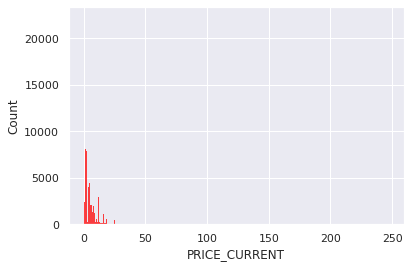

In [27]:
sns.histplot(df['PRICE_CURRENT'],color='red')

In [32]:
df.head(10)

,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163804
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163805
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163806
3,3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163807
4,4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12,NaN,2022-09-11 21:20:04,16163808
5,5,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",174071300,https://www.walmart.com/ip/Price-s-Green-Chili...,"Price's Green Chili Dip, 12 Oz.",Price's,3.12,3.12,12,NaN,2022-09-11 21:20:04,16163809
6,6,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",10294995,https://www.walmart.com/ip/Dean-s-French-Onion...,"Dean's, French Onion Dip, 16 oz Tub",Dean's,2.42,2.42,16,NaN,2022-09-11 21:20:04,16163810
7,7,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",37915367,https://www.walmart.com/ip/Marketside-Spinach-...,"Marketside Spinach & Artichoke Dip, 16 Oz",Marketside,5.54,5.54,16,NaN,2022-09-11 21:20:04,16163811
8,8,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",482903957,https://www.walmart.com/ip/Fresh-Cravings-Roas...,Fresh Cravings Roasted Red Pepper Hummus 10oz,Fresh Cravings,3.27,3.27,10,NaN,2022-09-11 21:20:04,16163812
9,9,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",538183292,https://www.walmart.com/ip/Marketside-Buffalo-...,"Marketside Buffalo Style Chicken Dip, 11 oz",Marketside,4.54,4.54,11,NaN,2022-09-11 21:20:04,16163813
